In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

In [3]:
df = pd.read_csv("/home/parnian/ML/interview/bank.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


   ## Description:
   The data is related with direct marketing campaigns of a Portuguese banking institution.<br/>
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,<br/>
   in order to access if the product (bank term deposit) would be (or not) subscribed.


   ## Input variables:

<ul>
    <li>1 - age (numeric)</li>
    <li>2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                        "blue-collar","self-employed","retired","technician","services") </li>
    <li>3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
    <li>4 - education (categorical: "unknown","secondary","primary","tertiary")</li>
    <li>5 - default: has credit in default? (binary: "yes","no")</li>
    <li>6 - balance: average yearly balance, in euros (numeric) </li>
    <li>7 - housing: has housing loan? (binary: "yes","no")</li>
    <li>8 - loan: has personal loan? (binary: "yes","no")</li>
   <li>9 - contact: contact communication type (categorical: "unknown","telephone","cellular") </li>
   <li>10 - day: last contact day of the month (numeric)</li>
   <li>11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")</li>
   <li>12 - duration: last contact duration, in seconds (numeric) </li>
   <li>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
   <li>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not     previously contacted)</li>
   <li>15 - previous: number of contacts performed before this campaign and for this client (numeric)</li>
   <li>16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
   <li>17 - y - has the client subscribed a term deposit? (binary: "yes","no")</li>
</ul>

In [4]:
df = df.replace("unknown", np.nan)

In [5]:
df = df.dropna(subset=['job'])

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no


In [7]:
df.isnull().sum()

age              0
job              0
marital          0
education     1730
default          0
balance          0
housing          0
loan             0
contact      12909
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36704
y                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44923 non-null  int64 
 1   job        44923 non-null  object
 2   marital    44923 non-null  object
 3   education  43193 non-null  object
 4   default    44923 non-null  object
 5   balance    44923 non-null  int64 
 6   housing    44923 non-null  object
 7   loan       44923 non-null  object
 8   contact    32014 non-null  object
 9   day        44923 non-null  int64 
 10  month      44923 non-null  object
 11  duration   44923 non-null  int64 
 12  campaign   44923 non-null  int64 
 13  pdays      44923 non-null  int64 
 14  previous   44923 non-null  int64 
 15  poutcome   8219 non-null   object
 16  y          44923 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


### **Preprocessing**

In [9]:
edu_map = {'tertiary':3, 'secondary':2,'primary':1}
df['education'] = df['education'].map(edu_map)
median_edu = df['education'].median()
df['education'] = df['education'].fillna(median_edu)
df['contact'] = df['contact'].map({'cellular':1, 'telephone':0})
median_contact = df['contact'].median()
df['contact'] = df['contact'].fillna(median_contact)
df['poutcome'] = df['poutcome'].map({'failure':0, 'other':-1, 'success':1})
median_poutcome = df['poutcome'].median()
df['poutcome'] = df['poutcome'].fillna(median_poutcome)


In [10]:
df['contact'] = df['contact'].map({1 : 'cellular', 0 :'telephone'})
df['contact']

0         cellular
1         cellular
2         cellular
3         cellular
5         cellular
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length: 44923, dtype: object

In [11]:
df['poutcome'] = df['poutcome'].map({0:'failure', -1:'other', 1:'success'})
df['poutcome']

0        failure
1        failure
2        failure
3        failure
5        failure
          ...   
45206    failure
45207    failure
45208    success
45209    failure
45210      other
Name: poutcome, Length: 44923, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44923 non-null  int64  
 1   job        44923 non-null  object 
 2   marital    44923 non-null  object 
 3   education  44923 non-null  float64
 4   default    44923 non-null  object 
 5   balance    44923 non-null  int64  
 6   housing    44923 non-null  object 
 7   loan       44923 non-null  object 
 8   contact    44923 non-null  object 
 9   day        44923 non-null  int64  
 10  month      44923 non-null  object 
 11  duration   44923 non-null  int64  
 12  campaign   44923 non-null  int64  
 13  pdays      44923 non-null  int64  
 14  previous   44923 non-null  int64  
 15  poutcome   44923 non-null  object 
 16  y          44923 non-null  object 
dtypes: float64(1), int64(7), object(9)
memory usage: 6.2+ MB


In [13]:
cat_columns = ['marital', 'contact', 'poutcome']

In [14]:
df = df.drop(['month', 'day'], axis=1)

In [15]:
df['y'] = df['y'].map({'no':0, 'yes':1})
df['default'] = df['default'].map({'no':0, 'yes':1})
df['housing'] = df['housing'].map({'no':0, 'yes':1})
df['loan'] = df['loan'].map({'no':0, 'yes':1})

In [16]:
from sklearn.preprocessing import minmax_scale
array_age = minmax_scale(df['age'], feature_range=(0, 1))
df['age'] = array_age

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [18]:
df['balance'] = scaler.fit_transform(df['balance'].values.reshape(-1, 1))
df['duration'] = scaler.fit_transform(df['duration'].values.reshape(-1, 1))


In [19]:
df = pd.get_dummies(df, columns=cat_columns)
df.head(3)

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.519481,management,3.0,0,0.257255,1,0,0.010497,1,-1,0,0,False,True,False,True,False,True,False,False
1,0.337662,technician,2.0,0,-0.436985,1,0,-0.416338,1,-1,0,0,False,False,True,True,False,True,False,False
2,0.194805,entrepreneur,2.0,0,-0.445851,1,1,-0.707362,1,-1,0,0,False,True,False,True,False,True,False,False


In [21]:
df.isnull().sum()

age                  0
job                  0
education            0
default              0
balance              0
housing              0
loan                 0
duration             0
campaign             0
pdays                0
previous             0
y                    0
marital_divorced     0
marital_married      0
marital_single       0
contact_cellular     0
contact_telephone    0
poutcome_failure     0
poutcome_other       0
poutcome_success     0
dtype: int64

### **EDA**

/tmp/ipykernel_16319/683867260.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="job", data=df, palette="Set3",


[Text(0.5, 1.0, 'Order of the Jobs')]

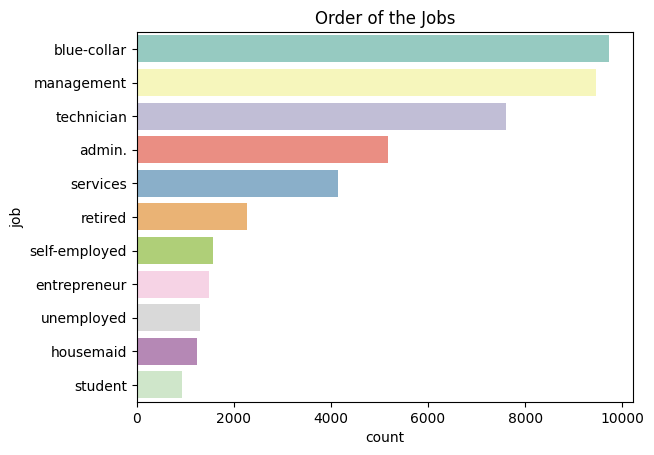

In [22]:
ax = sns.countplot(y="job", data=df, palette="Set3",
                   order=df['job'].value_counts().index,
                   dodge=False)
ax.set(title="Order of the Jobs")

[Text(0.5, 1.0, 'Order of the Jobs, y = 1')]

<Figure size 300x200 with 0 Axes>

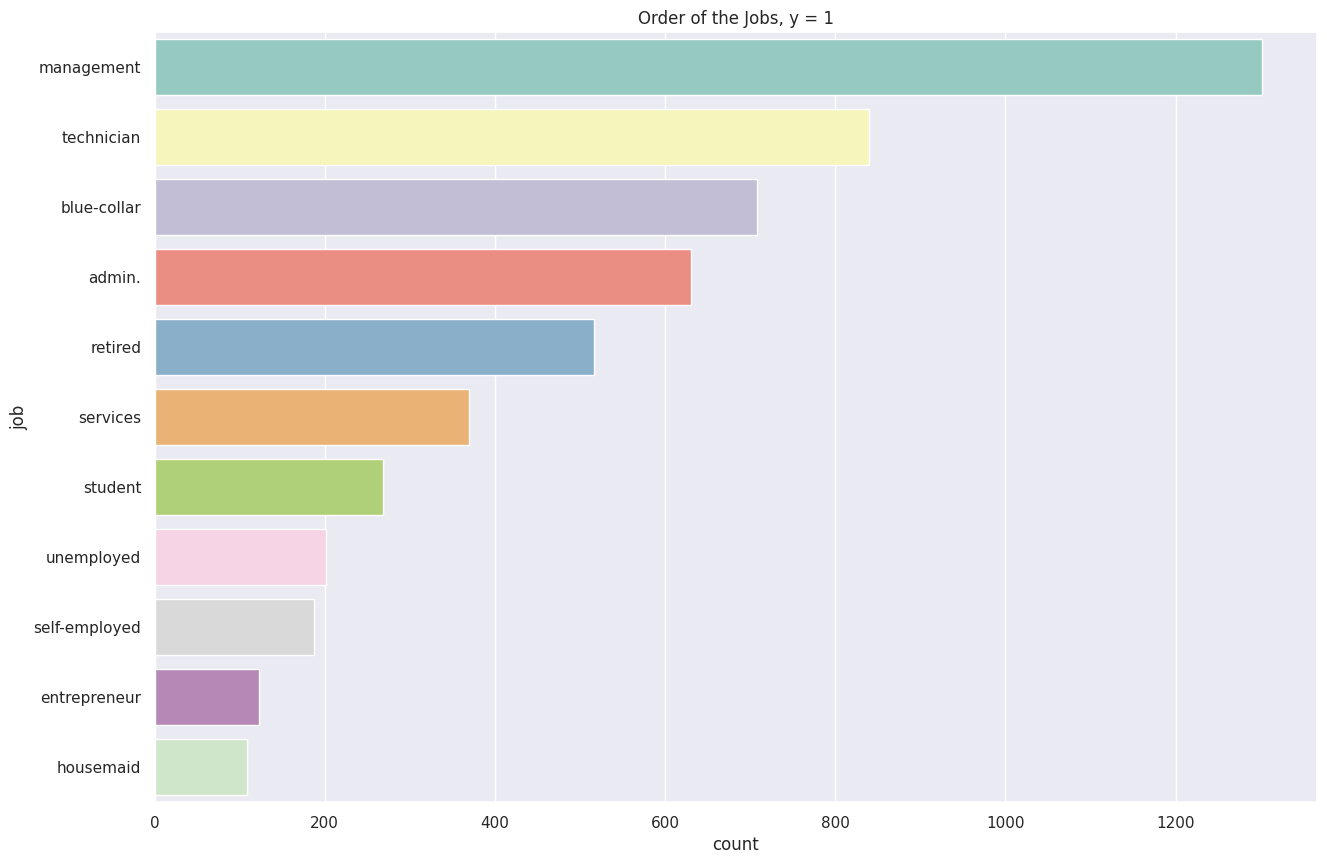

In [1090]:
plt.figure(figsize=(3,2))
df['job'] = df['job'].astype('category')
job_order = df[df['y'] == 1]['job'].value_counts().index
plt.figure(figsize=(15,10))
ax = sns.countplot(y="job", data=df[df['y'] == 1], palette="Set3",
                   order=job_order,
                   dodge=False)
ax.set(title="Order of the Jobs, y = 1")


/tmp/ipykernel_16319/318988368.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="job", data=df[df['y'] == 0], palette="Set3",


[Text(0.5, 1.0, 'Order of the Jobs, y = 0')]

<Figure size 300x200 with 0 Axes>

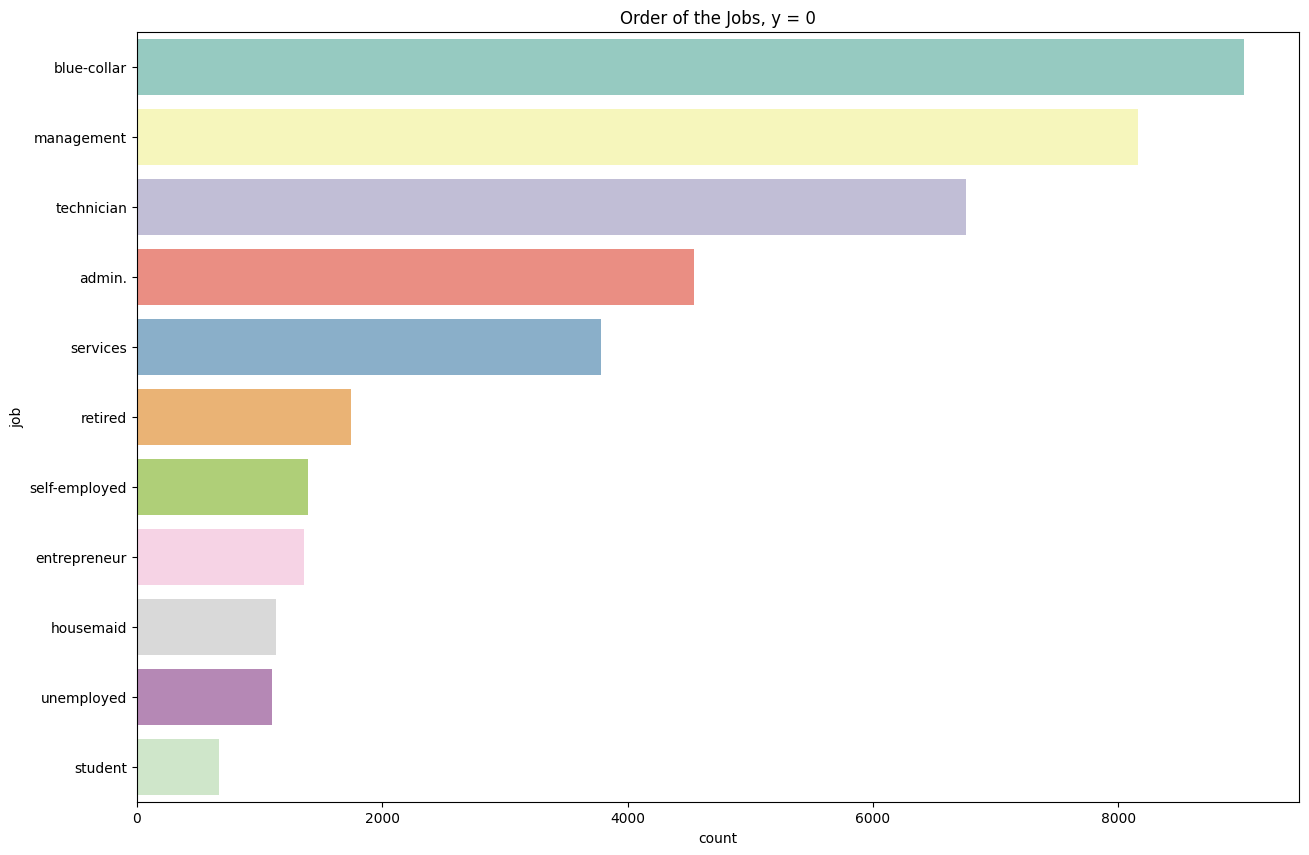

In [23]:
plt.figure(figsize=(3,2))
df['job'] = df['job'].astype('category')
job_order = df[df['y'] == 0]['job'].value_counts().index
plt.figure(figsize=(15,10))
ax = sns.countplot(y="job", data=df[df['y'] == 0], palette="Set3",
                   order=job_order,
                   dodge=False)
ax.set(title="Order of the Jobs, y = 0")


<Axes: xlabel='job', ylabel='previous'>

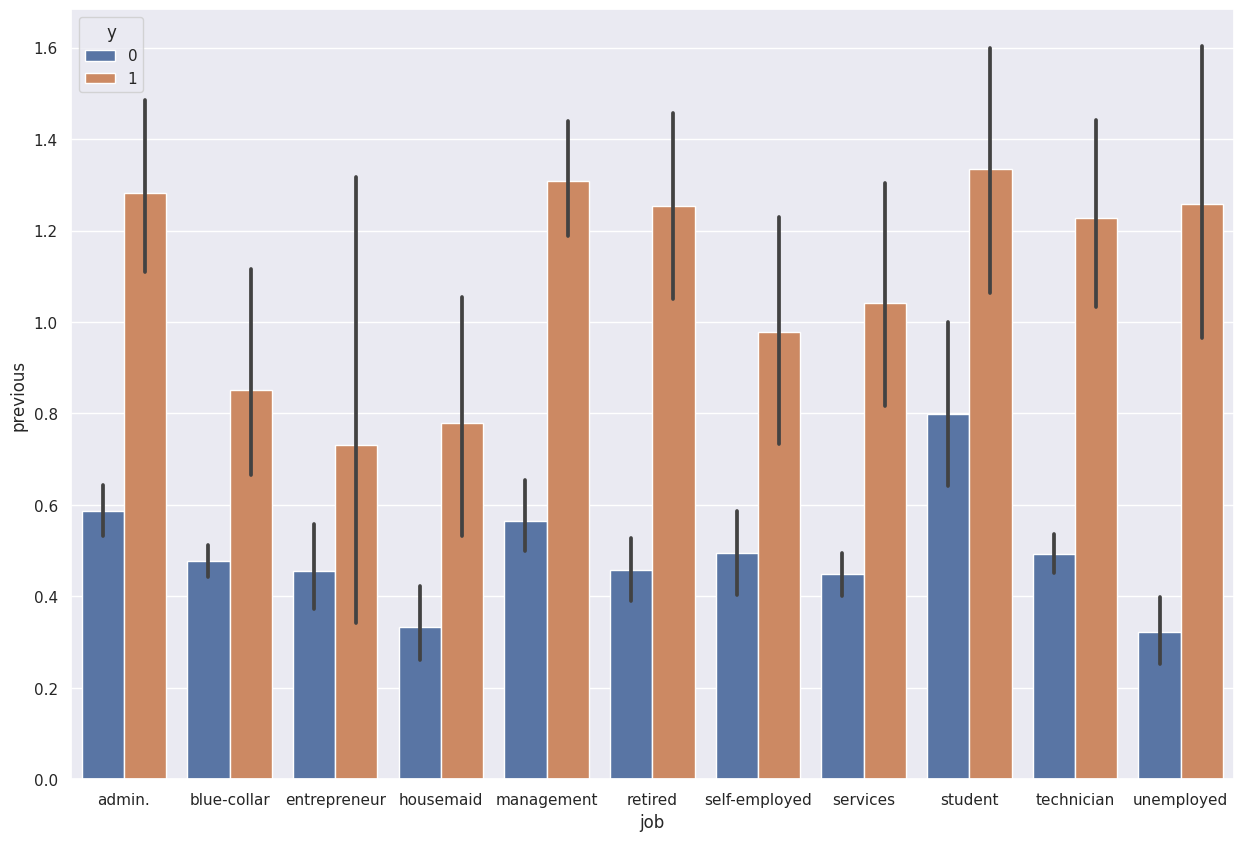

In [1092]:
plt.figure(figsize=(15,10))
sns.barplot(df, x="job", y="previous", hue="y")

<Axes: xlabel='job', ylabel='balance'>

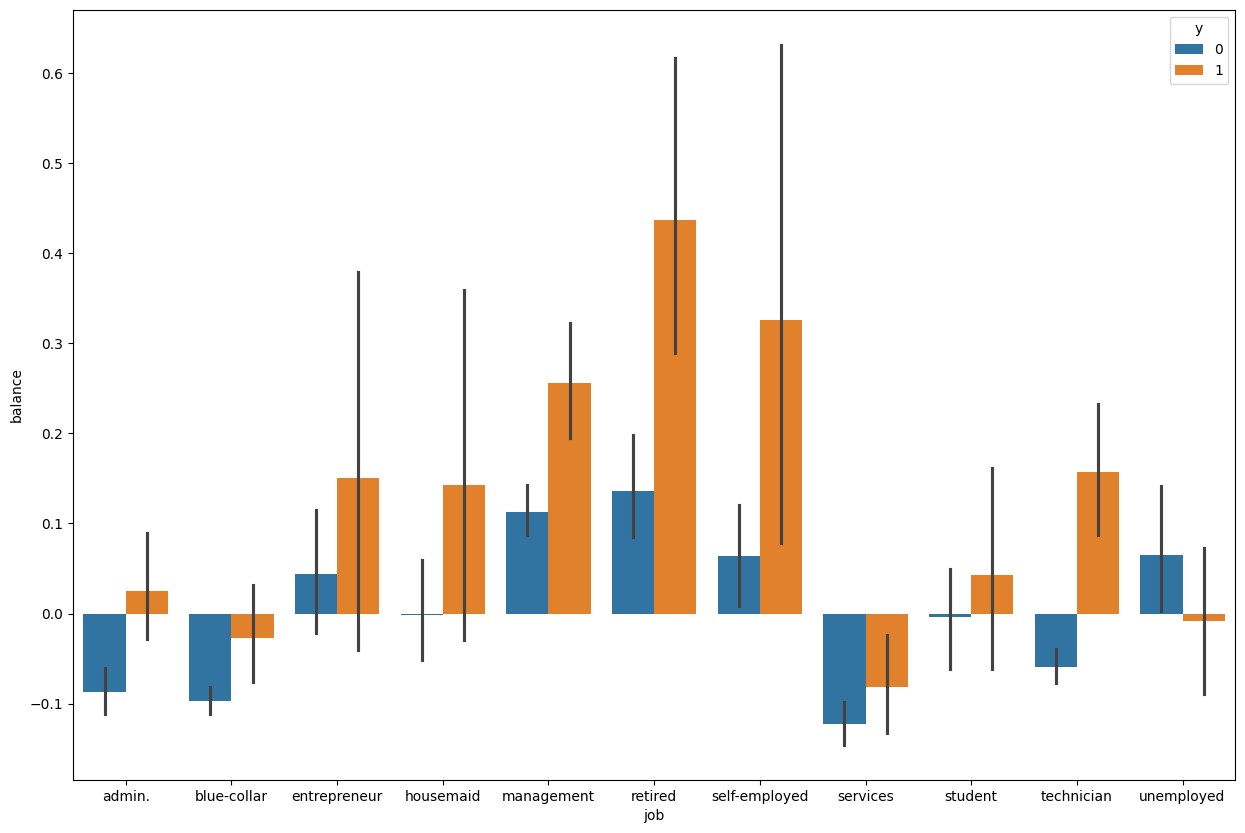

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(df, x="job", y="balance", hue="y")

<Axes: xlabel='job', ylabel='balance'>

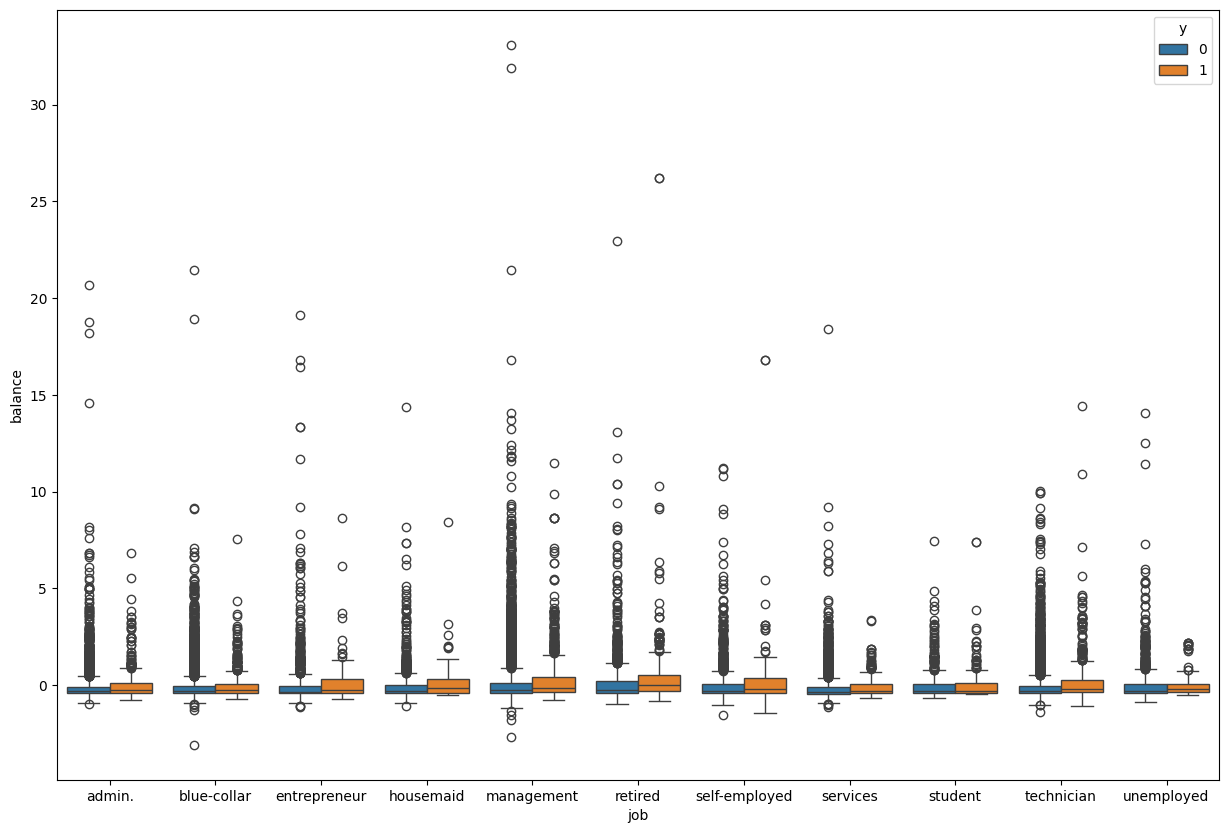

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="job", y="balance", hue="y")

<Axes: xlabel='job', ylabel='previous'>

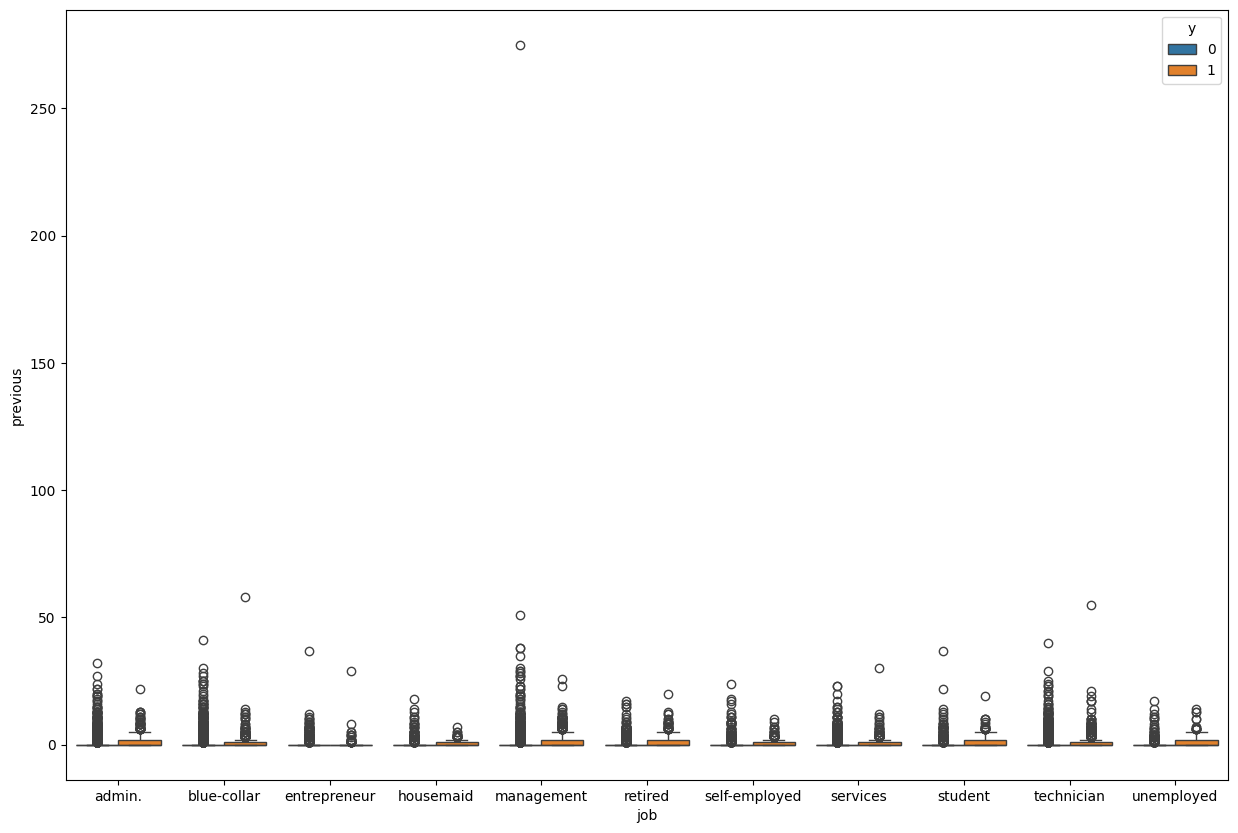

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="job", y="previous", hue="y")

<Axes: xlabel='previous', ylabel='Density'>

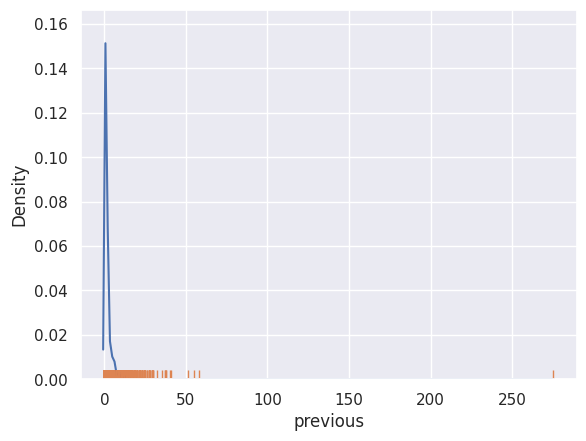

In [27]:
import seaborn as sns; sns.set_theme()
sns.kdeplot(data=df, x="previous")
sns.rugplot(data=df, x="previous")

<Axes: xlabel='age', ylabel='Density'>

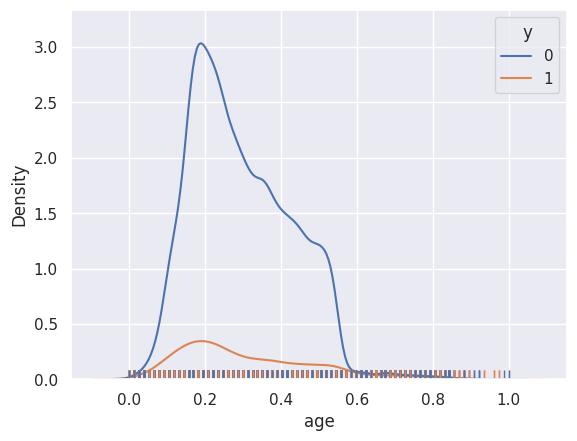

In [28]:
import seaborn as sns; sns.set_theme()
sns.kdeplot(data=df, x="age", hue="y")
sns.rugplot(data=df, x="age", hue="y")

<Axes: xlabel='previous', ylabel='Density'>

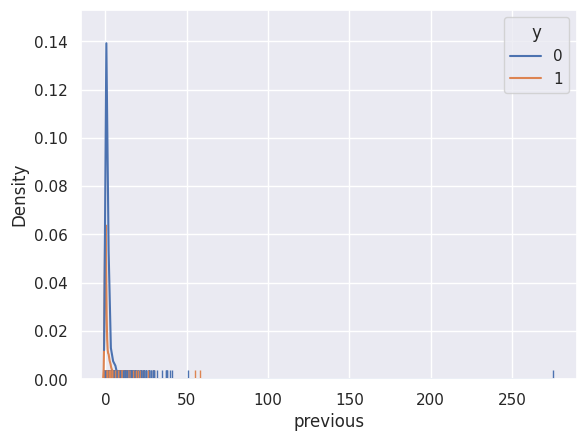

In [29]:
sns.kdeplot(data=df, x="previous", hue="y")
sns.rugplot(data=df, x="previous", hue="y")

<Axes: xlabel='loan', ylabel='Density'>

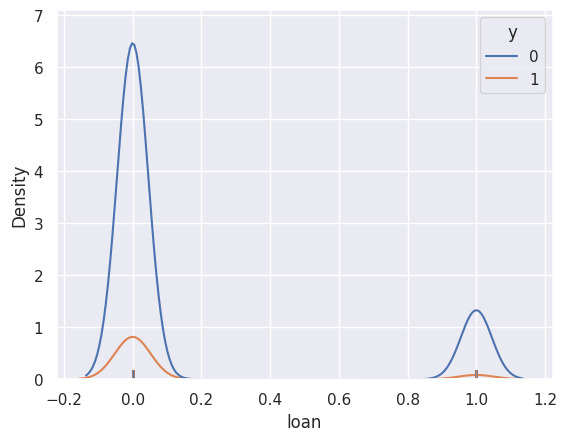

In [30]:
sns.kdeplot(data=df, x="loan", hue="y")
sns.rugplot(data=df, x="loan", hue="y")

<Axes: xlabel='default', ylabel='Density'>

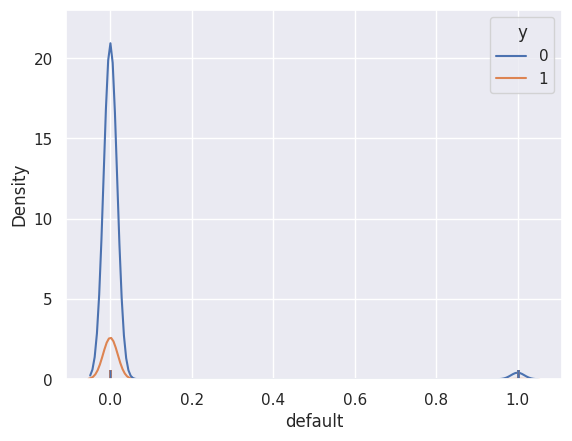

In [31]:
sns.kdeplot(data=df, x="default", hue="y")
sns.rugplot(data=df, x="default", hue="y")

<Axes: xlabel='housing', ylabel='Density'>

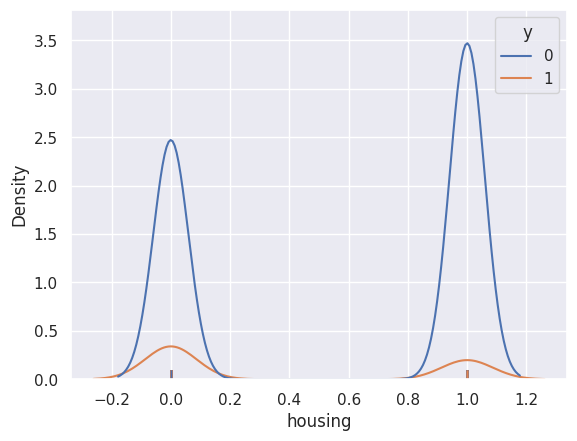

In [32]:
sns.kdeplot(data=df, x="housing", hue="y")
sns.rugplot(data=df, x="housing", hue="y")

<Axes: xlabel='age', ylabel='Density'>

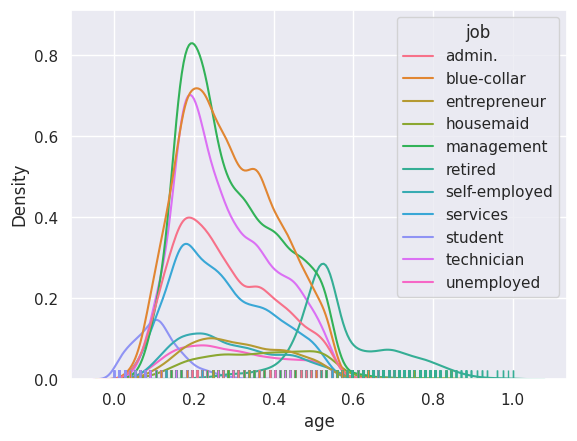

In [33]:
sns.kdeplot(data=df, x="age", hue="job")
sns.rugplot(data=df, x="age", hue="job")

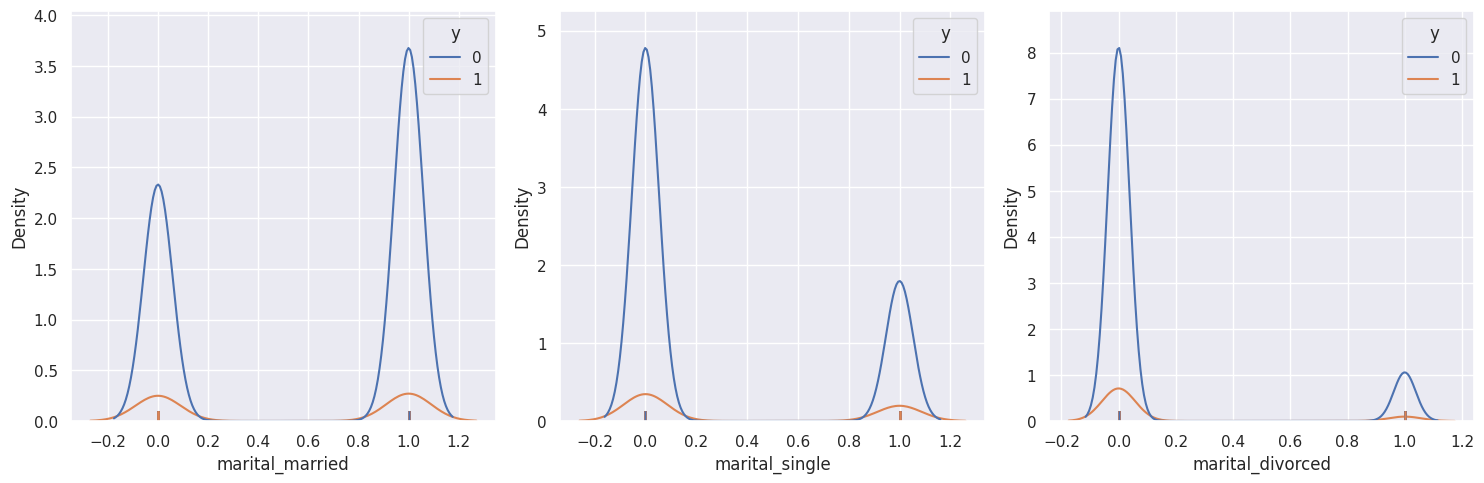

In [34]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.kdeplot(data=df, x="marital_married", hue="y", ax=axes[0])
sns.rugplot(data=df, x="marital_married", hue="y", ax=axes[0])

# Plot 2
sns.kdeplot(data=df, x="marital_single", hue="y", ax=axes[1])
sns.rugplot(data=df, x="marital_single", hue="y", ax=axes[1])

# Plot 3
sns.kdeplot(data=df, x="marital_divorced", hue="y", ax=axes[2])
sns.rugplot(data=df, x="marital_divorced", hue="y", ax=axes[2])

# Adjust layout
plt.tight_layout()
plt.show()


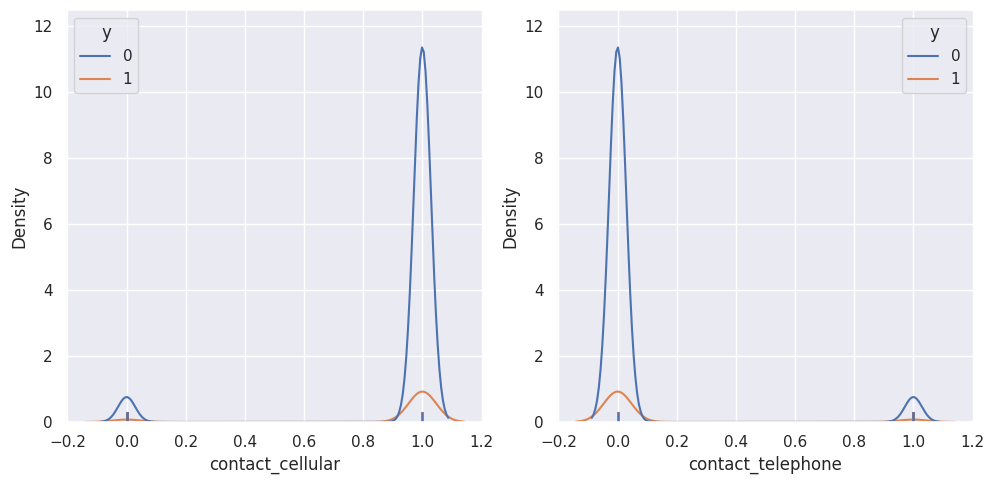

In [35]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1
sns.kdeplot(data=df, x="contact_cellular", hue="y", ax=axes[0])
sns.rugplot(data=df, x="contact_cellular", hue="y", ax=axes[0])

# Plot 2
sns.kdeplot(data=df, x="contact_telephone", hue="y", ax=axes[1])
sns.rugplot(data=df, x="contact_telephone", hue="y", ax=axes[1])

# Adjust layout
plt.tight_layout()
plt.show()


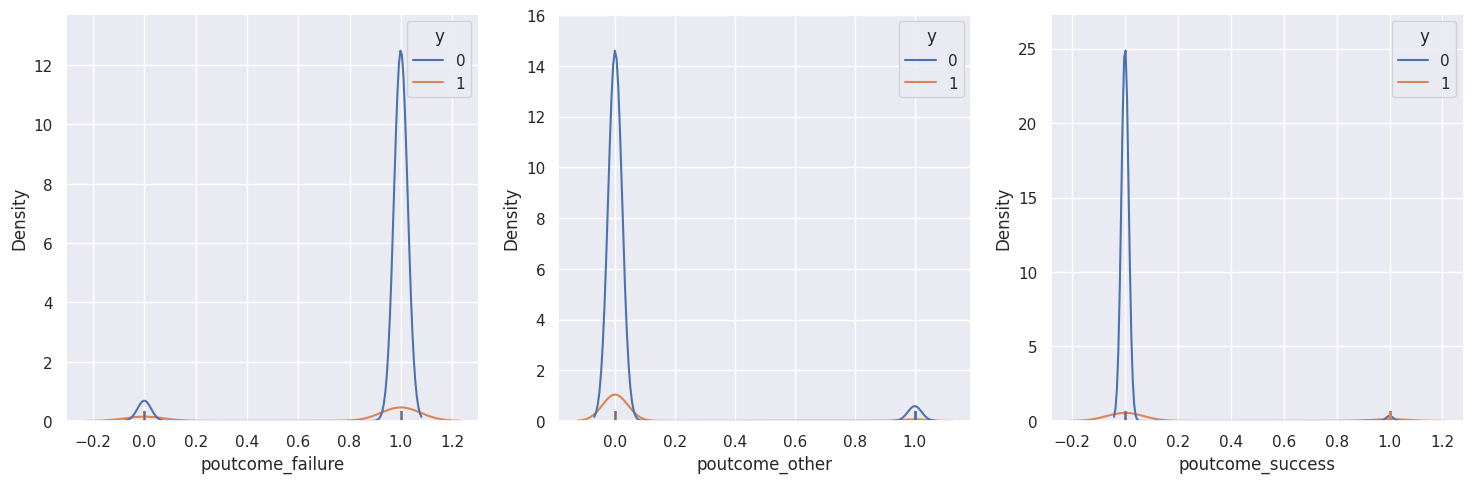

In [36]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.kdeplot(data=df, x="poutcome_failure", hue="y", ax=axes[0])
sns.rugplot(data=df, x="poutcome_failure", hue="y", ax=axes[0])

# Plot 2
sns.kdeplot(data=df, x="poutcome_other", hue="y", ax=axes[1])
sns.rugplot(data=df, x="poutcome_other", hue="y", ax=axes[1])

# Plot 3
sns.kdeplot(data=df, x="poutcome_success", hue="y", ax=axes[2])
sns.rugplot(data=df, x="poutcome_success", hue="y", ax=axes[2])

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

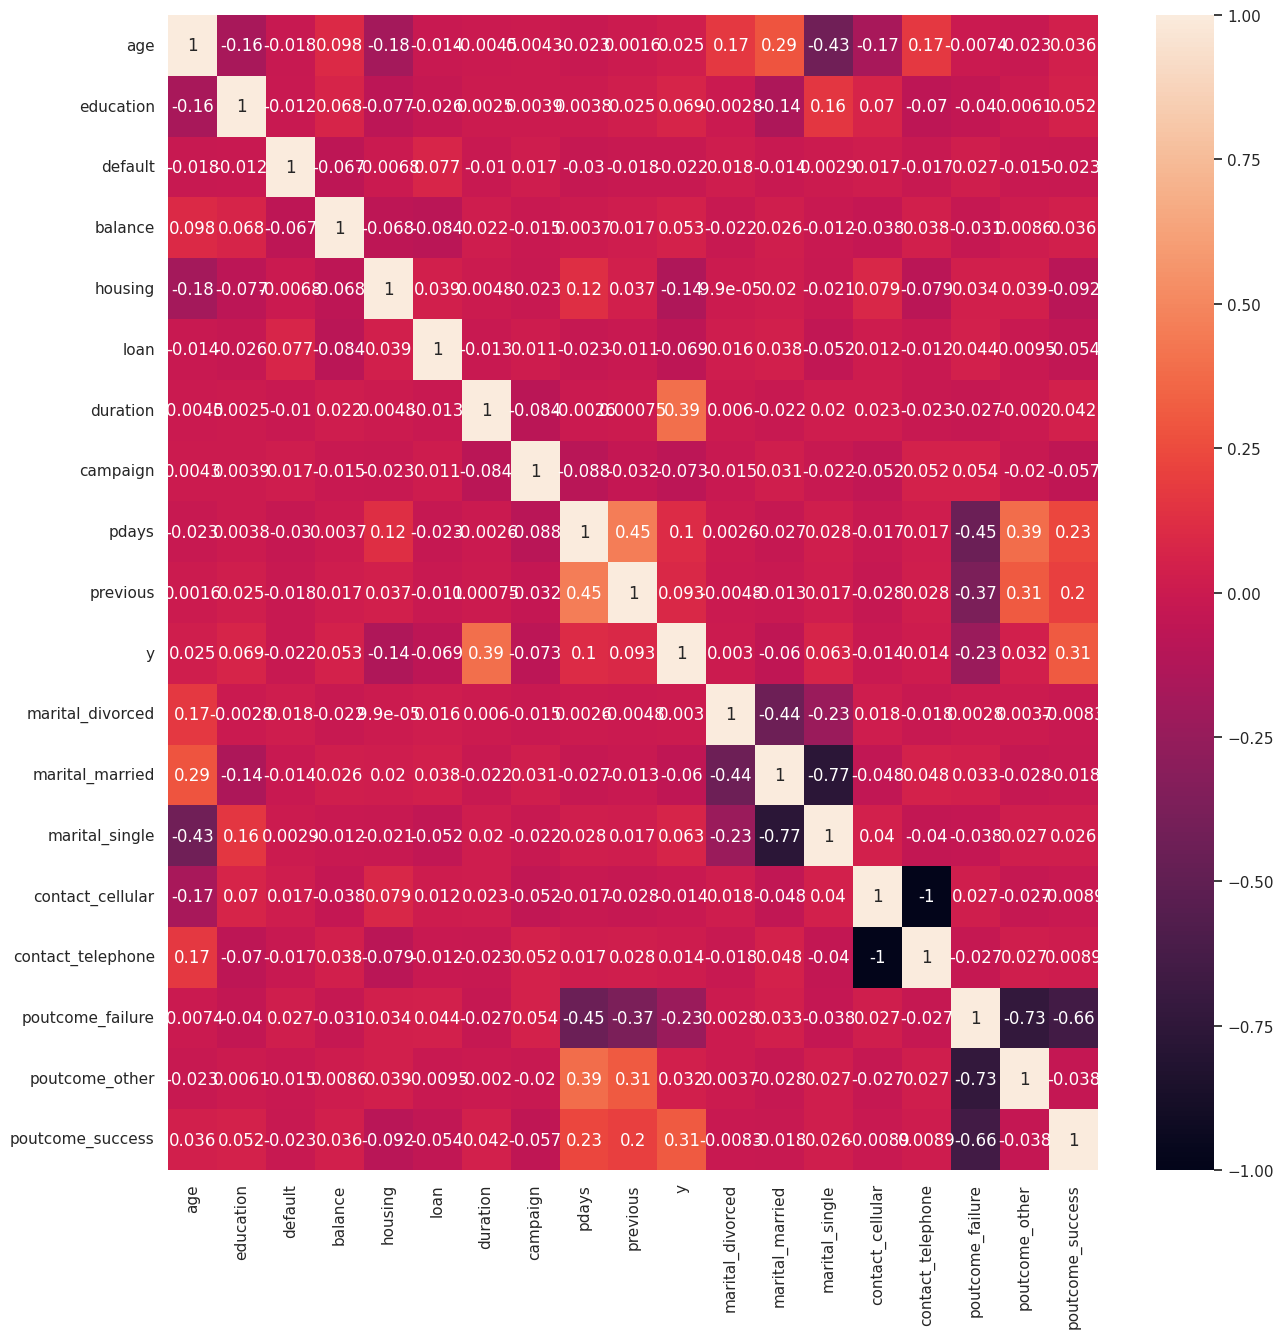

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.drop('job', axis=1).corr(), annot=True)

In [43]:
df.drop('job', axis=1).corr()['y'].sort_values()

poutcome_failure    -0.233594
housing             -0.139996
campaign            -0.072729
loan                -0.068741
marital_married     -0.060216
default             -0.022395
contact_cellular    -0.014310
marital_divorced     0.003008
contact_telephone    0.014310
age                  0.025411
poutcome_other       0.031816
balance              0.052814
marital_single       0.063306
education            0.068782
previous             0.092645
pdays                0.102585
poutcome_success     0.305930
duration             0.394595
y                    1.000000
Name: y, dtype: float64

### **Pipeline**

In [47]:
df1 = pd.read_csv("/home/parnian/ML/interview/bank.csv", delimiter=";")
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Define the mapping dictionaries
edu_map = {'tertiary': 3, 'secondary': 2, 'primary': 1}
contact_map = {'cellular': 1, 'telephone': 0}
poutcome_map = {'failure': 0, 'other': -1, 'success': 1}

# Separate categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create pipelines for categorical and numerical columns
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(categories='auto', handle_unknown='ignore')
)

numeric_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# Create a ColumnTransformer to combine the pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_pipeline, categorical_cols),
        ('numeric', numeric_pipeline, numeric_cols)
    ])

# Fit and transform the data
transformed_data = preprocessor.fit_transform(df1)

### **Model**

In [58]:
y = df1['y'].map({'no':0, 'yes':1})
X = transformed_data

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

## **Decision Tree**

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [62]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [63]:
predict_tree = tree_clf.predict(X_test)

In [64]:
print('Precision: %.3f' % precision_score(y_test, predict_tree))
print('Recall: %.3f' % recall_score(y_test, predict_tree))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_tree))
print('F1 Score: %.3f' % f1_score(y_test, predict_tree))

Precision: 0.611
Recall: 0.152
Accuracy: 0.889
F1 Score: 0.243


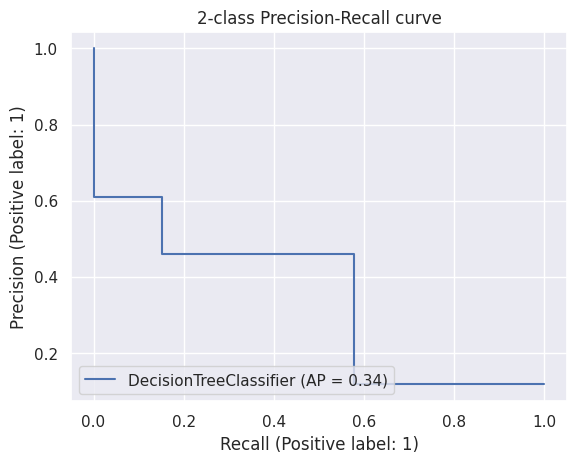

In [65]:

display = PrecisionRecallDisplay.from_estimator(
    tree_clf, X_test, y_test, name="DecisionTreeClassifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")



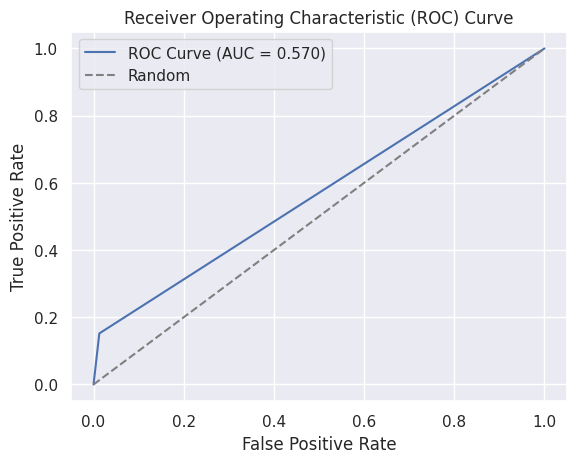

In [66]:
true_labels = y_test
predicted_probabilities_tree = predict_tree

# Calculate false positive rate, true positive rate, and thresholds
fpr_tree, tpr_tree, thresholds_tree = roc_curve(true_labels, predicted_probabilities_tree)

# Calculate the area under the ROC curve (AUC)
auc_tree = roc_auc_score(true_labels, predicted_probabilities_tree)

# Plot the ROC curve
plt.plot(fpr_tree, tpr_tree, label='ROC Curve (AUC = %.3f)' % auc_tree)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [67]:
print(confusion_matrix(y_test,predict_tree))
print(classification_report(y_test,predict_tree))
acc_tree = accuracy_score(y_test,predict_tree)

[[13006   169]
 [ 1480   265]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13175
           1       0.61      0.15      0.24      1745

    accuracy                           0.89     14920
   macro avg       0.75      0.57      0.59     14920
weighted avg       0.86      0.89      0.86     14920



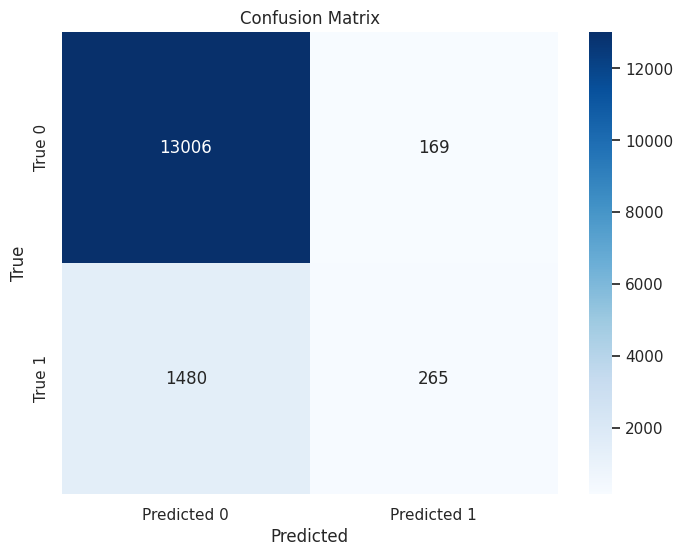

In [68]:
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,predict_tree), annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### **Random Forest Classifier**

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 250)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [70]:
predict_rf = rf_clf.predict(X_test)

In [71]:
print('Precision: %.3f' % precision_score(y_test, predict_rf))
print('Recall: %.3f' % recall_score(y_test, predict_rf))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_rf))
print('F1 Score: %.3f' % f1_score(y_test, predict_rf))

Precision: 0.655
Recall: 0.413
Accuracy: 0.906
F1 Score: 0.507


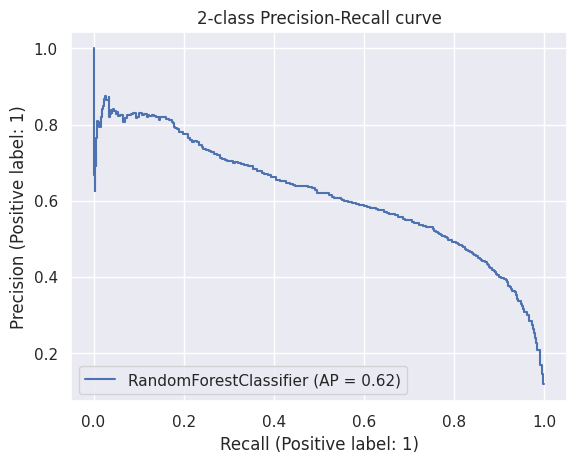

In [72]:

display = PrecisionRecallDisplay.from_estimator(
    rf_clf, X_test, y_test, name="RandomForestClassifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")



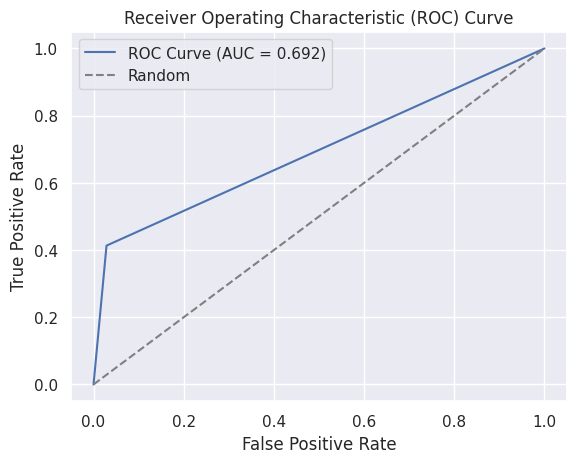

In [73]:
true_labels = y_test
predicted_probabilities_rf = predict_rf

# Calculate false positive rate, true positive rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(true_labels, predicted_probabilities_rf)

# Calculate the area under the ROC curve (AUC)
auc_rf = roc_auc_score(true_labels, predicted_probabilities_rf)

# Plot the ROC curve
plt.plot(fpr_rf, tpr_rf, label='ROC Curve (AUC = %.3f)' % auc_rf)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [74]:
print(confusion_matrix(y_test,predict_rf))
print(classification_report(y_test,predict_rf))
acc_rf = accuracy_score(y_test,predict_rf)

[[12796   379]
 [ 1024   721]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13175
           1       0.66      0.41      0.51      1745

    accuracy                           0.91     14920
   macro avg       0.79      0.69      0.73     14920
weighted avg       0.89      0.91      0.90     14920



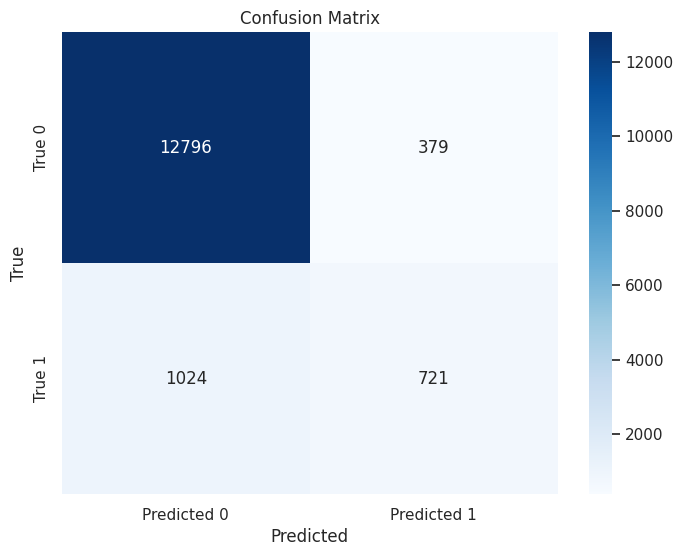

In [75]:
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,predict_rf), annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### **Support Vector Classifier**

In [76]:
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto')
svc_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [77]:
predict_svc = svc_clf.predict(X_test)

In [78]:
print('Precision: %.3f' % precision_score(y_test, predict_svc))
print('Recall: %.3f' % recall_score(y_test, predict_svc))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_svc))
print('F1 Score: %.3f' % f1_score(y_test, predict_svc))

Precision: 0.630
Recall: 0.280
Accuracy: 0.897
F1 Score: 0.387


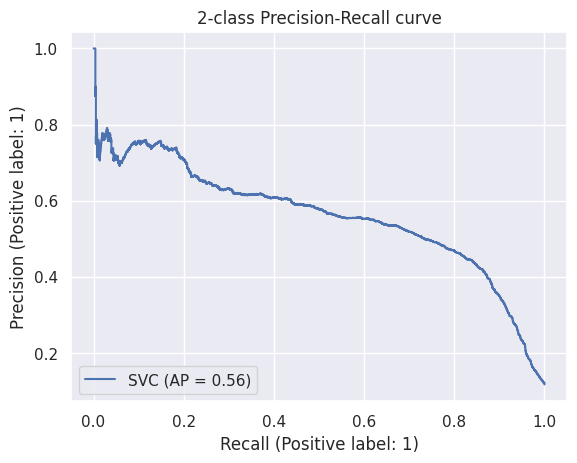

In [79]:

display = PrecisionRecallDisplay.from_estimator(
    svc_clf, X_test, y_test, name="SVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")



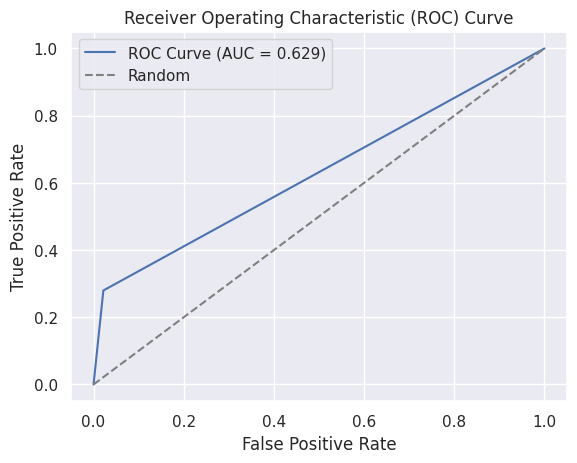

In [80]:
true_labels = y_test
predicted_probabilities_svc = predict_svc

# Calculate false positive rate, true positive rate, and thresholds
fpr_svc, tpr_svc, thresholds_svc = roc_curve(true_labels, predicted_probabilities_svc)

# Calculate the area under the ROC curve (AUC)
auc_svc = roc_auc_score(true_labels, predicted_probabilities_svc)

# Plot the ROC curve
plt.plot(fpr_svc, tpr_svc, label='ROC Curve (AUC = %.3f)' % auc_svc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [83]:
print(confusion_matrix(y_test,predict_svc))
print(classification_report(y_test,predict_svc))
acc_svc = accuracy_score(y_test,predict_svc)

[[12888   287]
 [ 1257   488]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     13175
           1       0.63      0.28      0.39      1745

    accuracy                           0.90     14920
   macro avg       0.77      0.63      0.67     14920
weighted avg       0.88      0.90      0.88     14920



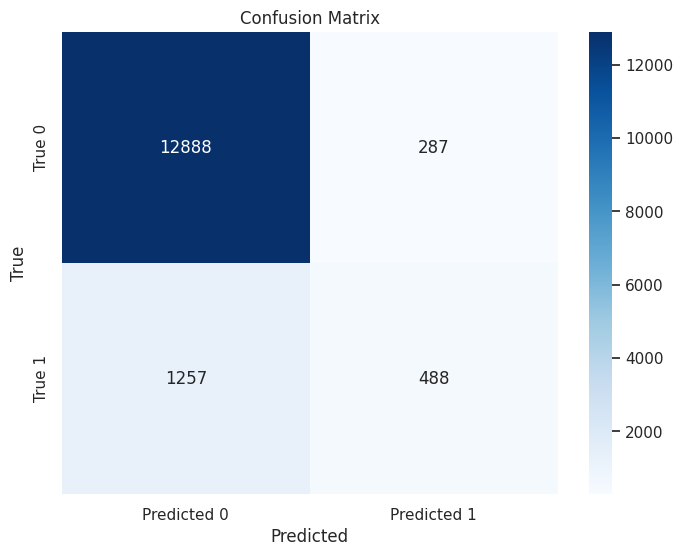

In [82]:
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,predict_svc), annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### **Fine Tuning**

### **Grid Search and Random Search for RF**

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model_rs = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10,
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
tree_clf_rs = model_rs
tree_clf_rs.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/home/parnian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/parnian/.

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

In [86]:
predict_tree_clf_rs = tree_clf_rs.predict(X_test)

In [87]:
print(confusion_matrix(y_test,predict_tree_clf_rs))
print(classification_report(y_test,predict_tree_clf_rs))
acc_tree_clf_rs = accuracy_score(y_test,predict_tree_clf_rs)


[[13175     0]
 [ 1745     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13175
           1       0.00      0.00      0.00      1745

    accuracy                           0.88     14920
   macro avg       0.44      0.50      0.47     14920
weighted avg       0.78      0.88      0.83     14920



/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
model_rs.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 2,
 'criterion': 'gini'}

In [89]:
rf_clf_optimised = RandomForestClassifier(n_estimators=20,
                                          min_samples_split=10,
                                          min_samples_leaf=6,
                                          max_features='sqrt',
                                          max_depth=2,
                                          criterion='gini')
rf_clf_optimised.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=20)

In [90]:
predict_rf_optimised = rf_clf_optimised.predict(X_test)

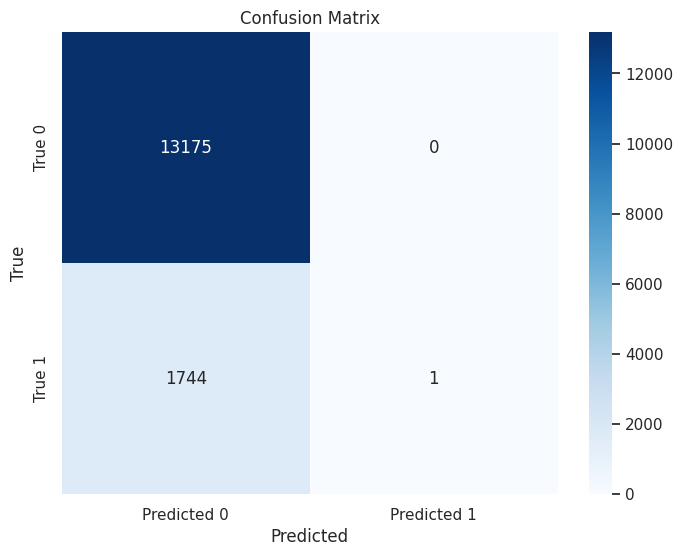

In [91]:
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,predict_rf_optimised), annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [92]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model_gs = GridSearchCV(estimator = clf, param_grid = grid_search,
                               cv = 4, verbose= 5, n_jobs = -1)
tree_clf_gs = model_gs
tree_clf_gs.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/home/parnian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/parnian/

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [20]},
             verbose=5)

In [94]:
predict_tree_clf_gs = tree_clf_gs.predict(X_test)

In [95]:
#Getting our accuracy score for the model
accuracy_rf_gs=tree_clf_gs.best_score_
accuracy_rf_gs

0.8831666113152984

In [96]:
model_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 20}

In [97]:
rf_clf_optimised_gs = RandomForestClassifier(n_estimators=20,
                                          min_samples_split=5,
                                          min_samples_leaf=4,
                                          max_features='sqrt',
                                          max_depth=2,
                                          criterion='entropy')
rf_clf_optimised_gs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=20)

In [98]:
predict_rf_optimised_gs = rf_clf_optimised_gs.predict(X_test)

[CV 4/4] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=nan total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.883 total time=   0.2s
[CV 4/4] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.883 total time=   0.2s
[CV 1/4] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=

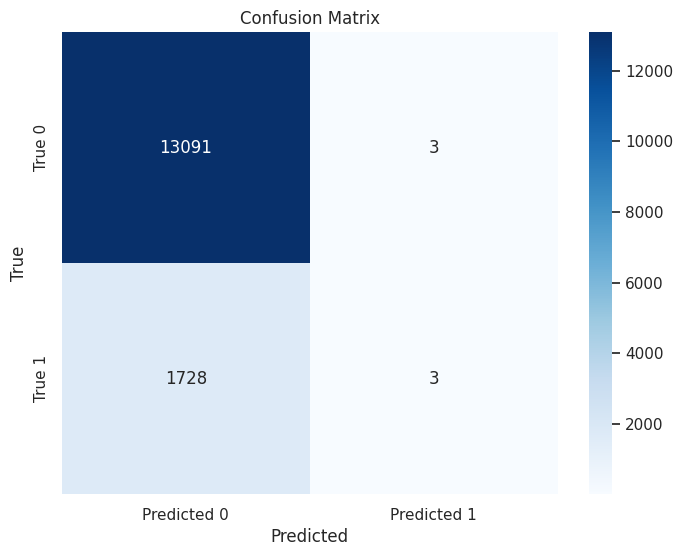

In [1195]:
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,predict_rf_optimised_gs), annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### **Grid Search and Random Search for SVC**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svc = SVC()
random_search = RandomizedSearchCV(estimator=svc, param_distributions=random_param_grid, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

In [ ]:
print("Best parameters found in random search:", random_search.best_params_)
print("Best score found in random search:", random_search.best_score_)


In [ ]:
from sklearn.model_selection import GridSearchCV
random_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_distributions=random_param_grid, n_iter=5, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters found in random search:", grid_search.best_params_)
print("Best score found in random search:", grid_search.best_score_)
